In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations

# Graph libraries
import rustworkx as rx
import networkx as nx
from rustworkx.visualization import mpl_draw

In [2]:
# Visualization settings
NS_PURPLE = "#8e44ad"  # Node color
NS_GREEN = "#2ecc71"   # Edge color
NS_ORANGE = "#FF9800"  # Highlight color

plt.rcParams['figure.figsize'] = (3, 2)
plt.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.edgecolor": "0.3",
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

In [3]:
# Utility functions

def pprint(G):
    """Pretty print basic graph statistics."""
    print(f"Graph has {G.num_nodes()} nodes and {G.num_edges()} edges")

def convert_rustworkx_to_networkx(graph):
    """Convert a rustworkx PyGraph or PyDiGraph to a networkx graph."""
    edge_list = [(
        graph[x[0]], graph[x[1]],
        {'weight': x[2]}) for x in graph.weighted_edge_list()]

    if isinstance(graph, rx.PyGraph):
        if graph.multigraph:
            return nx.MultiGraph(edge_list)
        else:
            return nx.Graph(edge_list)
    else:
        if graph.multigraph:
            return nx.MultiDiGraph(edge_list)
        else:
            return nx.DiGraph(edge_list)

# Chapter 2: Graph Theory

> **Network Science** by Albert-László Barabási  
> Companion Notebook using [RustWorkX](https://www.rustworkx.org/)

---

This notebook provides Python implementations of the key concepts from Chapter 2 of the Network Science textbook. We use the `rustworkx` library for efficient graph operations.

---
## 2.3 Degree, Average Degree and Degree Distribution

The **degree** of a node is the number of links connected to it. This section explores how to compute degrees, average degrees, and degree distributions in networks.

### 2.3.1 Degree

The total number of links $L$ in a network can be expressed in terms of node degrees:

$$L = \frac{1}{2} \sum_{i=1}^{N} k_i$$

where $k_i$ is the degree of node $i$. We divide by 2 because each link is counted twice (once for each endpoint).

In [ ]:
# Create a simple graph
G = rx.PyGraph()

nodes = [0, 1, 2, 3]
edges = [(0, 1), (1, 2), (1, 3), (2, 3)]

G.add_nodes_from(nodes)
G.add_edges_from_no_data(edges)

pprint(G)

Graph has 4 nodes and 4 edges


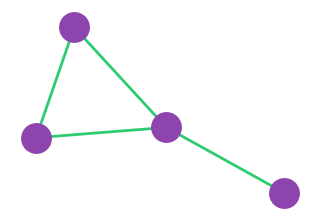

In [ ]:
# Visualize the graph
mpl_draw(G, node_color=NS_PURPLE, node_size=450, edge_color=NS_GREEN, width=2, with_labels=True)

In [ ]:
# Verify the formula: L = (1/2) * sum of all degrees
L = sum(G.degree(node) for node in G.node_indices()) / 2
print(f"Calculated L from degrees: {L}")
print(f"Actual number of edges: {G.num_edges()}")
assert L == G.num_edges(), "Formula verified!"

4.0


#### Adjacency Matrix Representation

A graph can also be represented as an **adjacency matrix** $A$, where $A_{ij} = 1$ if nodes $i$ and $j$ are connected, and $A_{ij} = 0$ otherwise.

In [ ]:
# Display the adjacency matrix
A = rx.adjacency_matrix(G)
print("Adjacency Matrix:")
print(A)
print(f"\nNumber of edges from adjacency matrix: {np.sum(A) / 2}")

[[0. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]


### 2.3.2 Average Degree

The **average degree** of a network is defined as:

$$\langle k \rangle = \frac{1}{N} \sum_{i=1}^{N} k_i = \frac{2L}{N}$$

This tells us how many connections a typical node has in the network.

In [ ]:
# Calculate average degree
L = G.num_edges()
N = G.num_nodes()
avg_degree = 2 * L / N

print(f"Number of edges (L): {L}")
print(f"Number of nodes (N): {N}")
print(f"Average degree ⟨k⟩ = 2L/N = {avg_degree:.2f}")

Graph G has 4 edges, 4 nodes. The average degree is 2.0


### 2.3.3 Degree Distribution

The **degree distribution** $p_k$ is the probability that a randomly selected node has degree $k$:

$$p_k = \frac{N_k}{N}$$

where $N_k$ is the number of nodes with degree $k$. The degree distribution must satisfy:

$$\sum_{k=0}^{\infty} p_k = 1$$

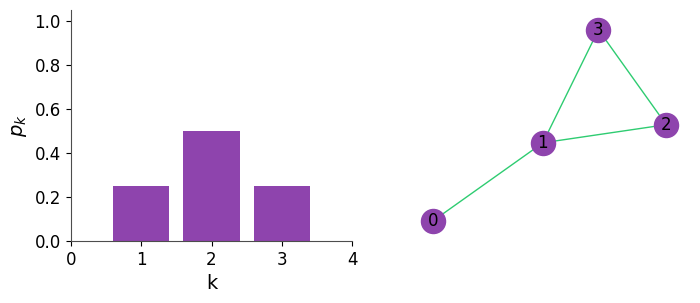

In [ ]:
# Example 1: Simple graph with varying degrees
G = rx.PyGraph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from_no_data([(0, 1), (1, 2), (1, 3), (2, 3)])

# Calculate degree distribution
degrees = [G.degree(n) for n in G.node_indices()]
vals, counts = np.unique(degrees, return_counts=True)
pk = counts / counts.sum()

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.bar(vals, pk, width=0.6, color=NS_PURPLE, edgecolor='white')
ax1.set_xlabel("Degree (k)")
ax1.set_ylabel(r"$p_k$")
ax1.set_title("Degree Distribution")
ax1.set_xlim(-0.5, max(vals) + 1)
ax1.set_ylim(0, 1.05)

mpl_draw(G, ax=ax2, node_color=NS_PURPLE, edge_color=NS_GREEN, with_labels=True, node_size=500)
ax2.set_title("Graph Structure")

plt.tight_layout()

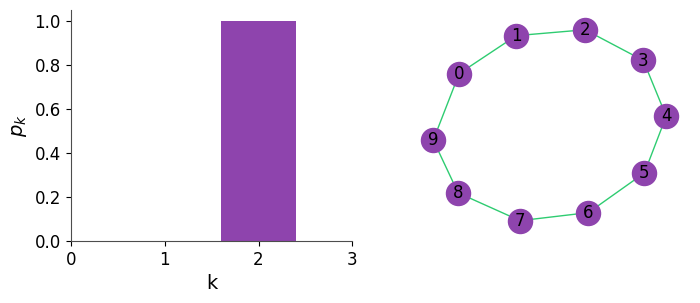

In [ ]:
# Example 2: Cycle graph (all nodes have the same degree)
G = rx.generators.cycle_graph(10)

degrees = [G.degree(n) for n in G.node_indices()]
vals, counts = np.unique(degrees, return_counts=True)
pk = counts / counts.sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.bar(vals, pk, width=0.6, color=NS_PURPLE, edgecolor='white')
ax1.set_xlabel("Degree (k)")
ax1.set_ylabel(r"$p_k$")
ax1.set_title("Degree Distribution (Cycle Graph)")
ax1.set_xlim(0, max(vals) + 2)
ax1.set_ylim(0, 1.05)

mpl_draw(G, ax=ax2, node_color=NS_PURPLE, edge_color=NS_GREEN, with_labels=True, node_size=400)
ax2.set_title("10-Node Cycle Graph")

plt.tight_layout()

---
## 2.4 Adjacency Matrix
For mathematical purposes we often represent a network through its adjacency matrix. The adjacency matrix of a directed network of N nodes has N rows and N columns, its elements being:

$Aij$ = 1 if there is a link pointing from node j to node i

$Aij$ = 0 if nodes i and j are not connected to each other

A.shape=(4, 4)

[[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


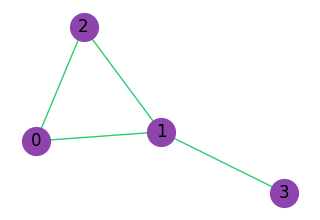

In [159]:
A = np.array([
    [0,1,1,0],
    [1,0,1,1],
    [1,1,0,0],
    [0,1,0,0]
], dtype=float)

print(f"{A.shape=}\n")
print(A)
G = rx.PyGraph.from_adjacency_matrix(A)
mpl_draw(G, node_color=NS_PURPLE, edge_color=NS_GREEN, with_labels=True, node_size=400)

##### Degree for undirected
$k_i = \sum_{j=1}^{N}A_{ji} = \sum_{i=1}^{N}A_{ji}$

In [160]:
# undirected
ki = np.sum(A, axis=1)
print(f"Degree for nodes i = {ki}")
assert np.all(np.sum(A, axis=1) == np.sum(A, axis=0))

Degree for nodes i = [2. 3. 2. 1.]


##### Degree for directed
$k_{i}^{in} = \sum_{j=1}^{N}A_{ij}$

$k_{i}^{out} = \sum_{j=1}^{N}A_{ji}$

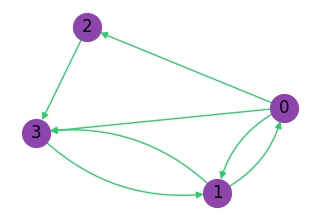

In [234]:
p, n = 0.3, 4
rng = np.random.default_rng(123)
A = (rng.random((n, n)) < p).astype(int)
A = A.astype(float)
np.fill_diagonal(A, 0)
G = rx.PyDiGraph.from_adjacency_matrix(A)
mpl_draw(G, node_color=NS_PURPLE, edge_color=NS_GREEN, with_labels=True, node_size=400)

In [184]:
# sum columns
in_degrees = np.sum(A, axis=0)
# sum rows
out_degrees = np.sum(A, axis=1)
for i, (k_in, k_out) in enumerate(zip(in_degrees, out_degrees)):
    print(f"Node {i=}")
    print(f"In degree {k_in}, Out degree {k_out}")

Node i=0
In degree 1.0, Out degree 3.0
Node i=1
In degree 2.0, Out degree 2.0
Node i=2
In degree 1.0, Out degree 1.0
Node i=3
In degree 3.0, Out degree 1.0


#### Trace Tricks

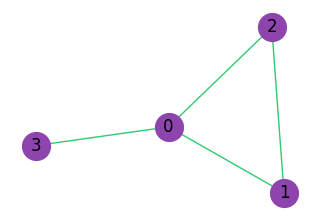

In [4]:
A = np.array([
[0,1,1,1],
[1,0,1,0],
[1,1,0,0],
[1,0,0,0]], dtype=float)
G = rx.PyGraph.from_adjacency_matrix(A)
mpl_draw(G, node_color=NS_PURPLE, edge_color=NS_GREEN, with_labels=True, node_size=400)

In [5]:
A = rx.adjacency_matrix(G)
v = np.ones(A.shape[0])

In [324]:
assert np.all(A.dot(v) == np.sum(A, axis=1))

In [325]:
assert np.all(A.dot(v).dot(v) == np.sum(A))

In [327]:
# methods to raise a matrix to a power (eg 2)
assert np.all(A.dot(A) == (A @ A))
assert np.all(A.dot(A) == np.linalg.matrix_power(A, 2))

#### The diagonal of an adjacency matrix that has been raised to the power `n` will have all walks of length `n` for that node index

In [330]:
A.dot(A)

array([[3., 1., 1., 0.],
       [1., 2., 1., 1.],
       [1., 1., 2., 1.],
       [0., 1., 1., 1.]])

In [332]:
np.diag(A.dot(A))

array([3., 2., 2., 1.])

In [335]:
# node 0 rows and cols. rows.dot(cols) == walks of length 2
A[0,:], A[:,0]

(array([0., 1., 1., 1.]), array([0., 1., 1., 1.]))

In [336]:
# count triangles undirected
np.diag(A @ A @ A).sum() == np.trace(A @ A @ A)

np.True_

In [340]:
# three non zero diag entries shows three nodes with walks of 3
np.linalg.matrix_power(A, 3)

array([[2., 4., 4., 3.],
       [4., 2., 3., 1.],
       [4., 3., 2., 1.],
       [3., 1., 1., 0.]])

In [342]:
# divide the trace (sum of the diag) by 6 for undirected (each triangle walked backward and forward) to the the number of triangles
np.trace(np.linalg.matrix_power(A, 3)) // 6

np.float64(1.0)

In [343]:
length = 3
for node, walks in zip(G.node_indexes(),np.diagonal(np.linalg.matrix_power(A, length))):
    print(f"node {node} has {walks} walks of length {length}")

node 0 has 2.0 walks of length 3
node 1 has 2.0 walks of length 3
node 2 has 2.0 walks of length 3
node 3 has 0.0 walks of length 3


---
## 2.7 Bipartite Graphs

A **bipartite graph** (or bigraph) is a network whose nodes can be divided into two disjoint sets $U$ and $V$ such that each link connects a node in $U$ to a node in $V$. In other words, there are no edges between nodes within the same set.

### 2.7.1 Creating a Bipartite Graph

In [ ]:
# Create a bipartite graph
G = rx.PyGraph()

# Add two disjoint sets of nodes
us = G.add_nodes_from(list(range(7)))           # Set U: integers 0-6
vs = G.add_nodes_from(['A', 'B', 'C', 'D'])     # Set V: letters A-D

# Add edges (only between U and V)
edges = [
    (us[0], vs[0]), (us[1], vs[0]), (us[2], vs[0]),
    (us[1], vs[1]), (us[4], vs[1]),
    (us[3], vs[2]), (us[4], vs[2]),
    (us[4], vs[3]), (us[5], vs[3]), (us[6], vs[3])
]
G.add_edges_from_no_data(edges)

print(f"Is bipartite: {rx.is_bipartite(G)}")

EdgeIndices[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

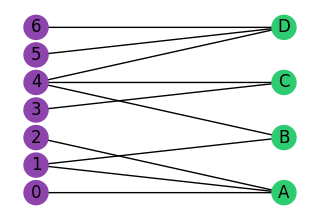

In [ ]:
# Visualize with different colors for each set
u_colors = [NS_PURPLE] * len(us)
v_colors = [NS_GREEN] * len(vs)
colors = u_colors + v_colors

layout = rx.bipartite_layout(G, set(us))
mpl_draw(G, pos=layout, node_color=colors, labels=lambda x: str(x), 
         with_labels=True, node_size=500, font_color='white')
plt.title("Bipartite Graph (Purple = U, Green = V)")

### 2.7.2 Bipartite Projections

A bipartite graph can be projected onto either of its node sets. The **projection** onto set $U$ creates a new graph where two $U$-nodes are connected if they share a common neighbor in $V$.

In [ ]:
# Helper functions for bipartite projection

def bipartite_colors(G):
    """Return the two color sets of a bipartite graph."""
    if not rx.is_bipartite(G):
        return None
    c_map = defaultdict(set)
    for k, v in rx.two_color(G).items():
        c_map[v].add(k)
    return list(c_map.values())

def bipartite_project(B, target_nodes):
    """
    Project a bipartite graph onto a set of target nodes.
    Two target nodes are connected if they share a common neighbor.
    """
    other_nodes = set(B.node_indexes()).difference(target_nodes)
    
    # Create subgraph with only target nodes
    G, n_map = B.subgraph_with_nodemap(list(target_nodes))
    ix_map = {v: k for k, v in n_map.items()}
    
    # Find projected edges through shared neighbors
    projected_edges = set()
    for k in other_nodes:
        neighbors = list(B.neighbors(k))
        edges = set(combinations(neighbors, 2))
        projected_edges.update(edges)
    
    # Add edges to new graph
    new_edges = [(ix_map[i], ix_map[j]) for i, j in projected_edges if i in ix_map and j in ix_map]
    G.add_edges_from_no_data(new_edges)
    
    return G, n_map

In [ ]:
# Get the bipartite sets
U, V = bipartite_colors(G)
print(f"Set U (nodes): {sorted(U)}")
print(f"Set V (nodes): {sorted(V)}")

Sets U and V for the bipartite graph G:
U = {0, 1, 2, 3, 4, 5, 6}
V = {8, 9, 10, 7}


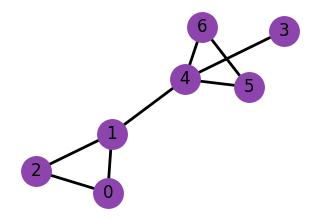

In [ ]:
# Projection onto U (purple nodes)
H_u, _ = bipartite_project(G, U)
mpl_draw(H_u, node_color=NS_PURPLE, node_size=500, edge_color='gray', 
         width=2, with_labels=True, font_color='white')
plt.title("Projection onto U")

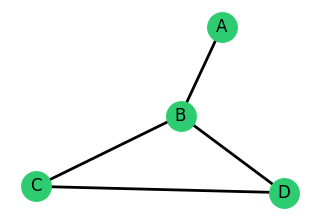

In [ ]:
# Projection onto V (green nodes)
H_v, _ = bipartite_project(G, V)
mpl_draw(H_v, node_color=NS_GREEN, node_size=500, edge_color='gray', 
         width=2, with_labels=True, labels=lambda x: str(x), font_color='white')
plt.title("Projection onto V")

---
## 2.8 Paths and Distances

Understanding paths and distances is fundamental to network analysis. This section covers key concepts including shortest paths, network diameter, and average path length.

### Key Definitions

| Term | Definition |
|------|------------|
| **Path** | A sequence of nodes where each consecutive pair is connected by an edge |
| **Shortest Path (Geodesic)** | The path with minimum number of edges between two nodes |
| **Distance ($d_{ij}$)** | The length of the shortest path between nodes $i$ and $j$ |
| **Diameter ($d_{max}$)** | The longest shortest path in the network |
| **Average Path Length ($\langle d \rangle$)** | The mean distance between all pairs of nodes |
| **Cycle** | A closed path that starts and ends at the same node |
| **Eulerian Path** | A path that traverses each edge exactly once |
| **Hamiltonian Path** | A path that visits each node exactly once |

### Example Network

Let's create a random graph to demonstrate these concepts:

In [ ]:
# Generate a random graph using Erdős-Rényi model
N, p = 10, 0.25  # 10 nodes, 25% edge probability
G = rx.undirected_gnp_random_graph(N, p, seed=10)

# Fixed layout for consistent visualization
pos = rx.spring_layout(G, seed=2)

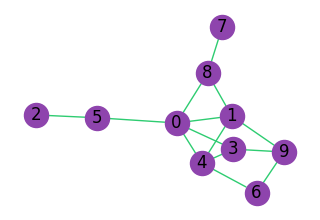

In [ ]:
mpl_draw(G, node_color=NS_PURPLE, edge_color=NS_GREEN, pos=pos, 
         with_labels=True, node_size=500, font_color='white')
plt.title(f"Random Graph (N={N}, p={p})")

### Path Example

A **path** is a sequence of nodes where each consecutive pair is connected. The path 7 → 8 → 0 → 1 → 4 has length 4 (four edges).

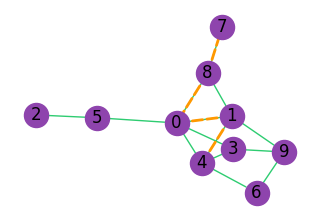

In [ ]:
# Highlight a path
path_nodes = [7, 8, 0, 1, 4]
path_edges = list(zip(path_nodes, path_nodes[1:]))
path_subgraph = G.edge_subgraph(path_edges)

mpl_draw(G, node_color=NS_PURPLE, edge_color=NS_GREEN, pos=pos, 
         with_labels=True, node_size=500, font_color='white', alpha=0.5)
mpl_draw(path_subgraph, pos=pos, node_size=0, edge_color=NS_ORANGE, width=3, style="--")
plt.title(f"Path: {' → '.join(map(str, path_nodes))} (length = {len(path_nodes)-1})")

### Shortest Path (Geodesic)

The **shortest path** between two nodes is the path with the minimum number of edges. There may be multiple shortest paths of the same length.

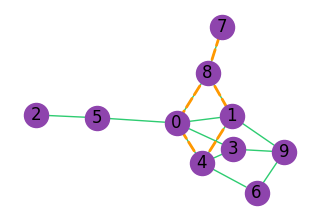

In [ ]:
# Find all shortest paths between nodes 7 and 4
source, target = 7, 4
all_shortest_paths = rx.all_shortest_paths(G, source, target)

print(f"All shortest paths from {source} to {target}:")
for path in all_shortest_paths:
    print(f"  {list(path)}")

# Visualize
paths_edges = [list(zip(path, path[1:])) for path in all_shortest_paths]
path_subgraph = G.edge_subgraph(sum(paths_edges, []))

mpl_draw(G, node_color=NS_PURPLE, edge_color=NS_GREEN, pos=pos, 
         with_labels=True, node_size=500, font_color='white', alpha=0.5)
mpl_draw(path_subgraph, pos=pos, node_size=0, edge_color=NS_ORANGE, width=3, style="--")
plt.title(f"Shortest Paths: {source} → {target} (distance = {len(all_shortest_paths[0])-1})")

### Diameter

The **diameter** ($d_{max}$) is the maximum shortest path length between any pair of nodes—the distance between the two most distant nodes in the network.

In [ ]:
# Compute all pairs shortest paths
apsp = rx.all_pairs_bellman_ford_shortest_paths(G, edge_cost_fn=lambda x: 1)

# Group paths by length
path_len_map = defaultdict(list)
for node, mapping in apsp.items():
    for target, path in mapping.items():
        path_len = len(path) - 1  # Length = number of edges
        path_len_map[path_len].append(path)

# Find diameter
diameter = max(path_len_map.keys())
print(f"Diameter of G: {diameter}")
print(f"\nPaths with length = diameter:")
for path in path_len_map[diameter][:4]:  # Show first 4
    print(f"  {list(path)}")

Diameter of G: 4
Paths with length = Diameter = 4:
[2, 5, 0, 4, 6]
[2, 5, 0, 8, 7]
[2, 5, 0, 3, 9]
[6, 4, 0, 5, 2]
[6, 4, 1, 8, 7]
[7, 8, 0, 5, 2]
[7, 8, 1, 9, 6]
[9, 3, 0, 5, 2]


One example of a diameter path


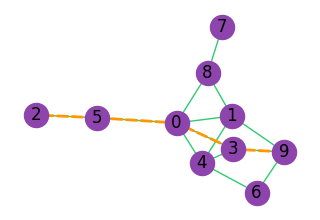

In [ ]:
# Visualize one diameter path
example_path = list(path_len_map[diameter][0])
path_edges = list(zip(example_path, example_path[1:]))
path_subgraph = G.edge_subgraph(path_edges)

mpl_draw(G, node_color=NS_PURPLE, edge_color=NS_GREEN, pos=pos, 
         with_labels=True, node_size=500, font_color='white', alpha=0.5)
mpl_draw(path_subgraph, pos=pos, node_size=0, edge_color=NS_ORANGE, width=3, style="--")
plt.title(f"Diameter Path: {' → '.join(map(str, example_path))} (d_max = {diameter})")

### Cycles

A **cycle** is a closed path where the start and end nodes are the same, with no other repeated vertices.

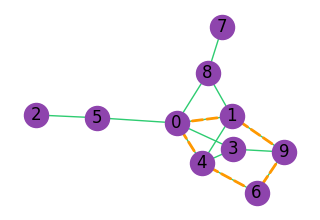

In [ ]:
# Example cycle in the graph
cycle_path = [0, 4, 6, 9, 1, 0]
path_edges = list(zip(cycle_path, cycle_path[1:]))
path_subgraph = G.edge_subgraph(path_edges)

mpl_draw(G, node_color=NS_PURPLE, edge_color=NS_GREEN, pos=pos, 
         with_labels=True, node_size=500, font_color='white', alpha=0.5)
mpl_draw(path_subgraph, pos=pos, node_size=0, edge_color=NS_ORANGE, width=3, style="--")
plt.title(f"Cycle: {' → '.join(map(str, cycle_path))}")

### Eulerian Paths

An **Eulerian path** traverses each edge exactly once. An undirected graph has an Eulerian path if and only if:
1. Either 0 or 2 vertices have odd degree, AND
2. All vertices with non-zero degree are in one connected component

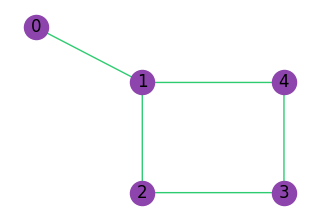

In [ ]:
# Create a graph with an Eulerian path
G_euler = rx.PyGraph()
nodes = [0, 1, 2, 3, 4]
edges = [(0, 1), (1, 2), (1, 4), (2, 3), (3, 4)]

pos_euler = {
    0: (-0.75, 1.5), 1: (0, 1), 2: (0, 0), 3: (1, 0), 4: (1, 1)
}

G_euler.add_nodes_from(nodes)
G_euler.add_edges_from_no_data(edges)

mpl_draw(G_euler, node_color=NS_PURPLE, pos=pos_euler, edge_color=NS_GREEN, 
         with_labels=True, node_size=500, font_color='white')
plt.title("Graph for Eulerian Path Analysis")

In [ ]:
# Check Eulerian path conditions
degrees = [G_euler.degree(n) for n in G_euler.node_indexes()]
odd_degree_count = sum(d % 2 != 0 for d in degrees)
components = rx.connected_components(G_euler)

condition_1 = odd_degree_count in [0, 2]
condition_2 = len(components) == 1

print("Eulerian Path Conditions:")
print(f"  1. Nodes with odd degree: {odd_degree_count} (need 0 or 2) ✓" if condition_1 else f"  1. Nodes with odd degree: {odd_degree_count} ✗")
print(f"  2. Connected components: {len(components)} (need 1) ✓" if condition_2 else f"  2. Connected components: {len(components)} ✗")
print(f"\nGraph has Eulerian path: {condition_1 and condition_2}")

Graph G has Eulerian Path: True


### The Königsberg Bridge Problem

The famous **Königsberg Bridge Problem** asks whether it's possible to walk through the city crossing each bridge exactly once. Euler proved this is impossible because the graph has more than 2 vertices with odd degree.

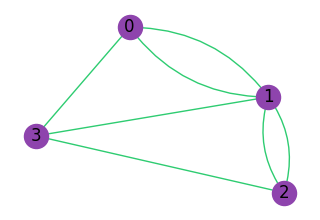

In [ ]:
# Model the Königsberg bridges as a multigraph
G_konig = rx.PyGraph()
G_konig.add_nodes_from(list(range(4)))  # 4 land masses
# 7 bridges connecting them
edges = [(0, 1), (0, 1), (1, 2), (1, 2), (1, 3), (0, 3), (2, 3)]
G_konig.add_edges_from_no_data(edges)

mpl_draw(G_konig, node_color=NS_PURPLE, edge_color=NS_GREEN, 
         with_labels=True, node_size=500, font_color='white')
plt.title("Königsberg Bridges")

In [ ]:
# Check if Königsberg has an Eulerian path
degrees = [G_konig.degree(n) for n in G_konig.node_indexes()]
odd_degree_count = sum(d % 2 != 0 for d in degrees)

print("Node degrees:", degrees)
print(f"Nodes with odd degree: {odd_degree_count}")
print(f"\nEulerian path exists: {odd_degree_count in [0, 2]}")
print("\n→ Euler proved it's impossible to cross all bridges exactly once!")

Graph G has Eulerian path: False


### Hamiltonian Paths

A **Hamiltonian path** visits each node exactly once. Unlike Eulerian paths, determining if a Hamiltonian path exists is NP-complete—there's no known efficient algorithm.

### Average Path Length

The **average path length** $\langle d \rangle$ is the mean distance between all pairs of nodes:

$$\langle d \rangle = \frac{1}{N(N-1)} \sum_{\substack{i,j = 1 \\ i \ne j}}^{N} d_{i,j}$$

This metric characterizes how efficiently information can spread through a network.

In [ ]:
# Distance matrix shows shortest path lengths between all pairs
print("Distance Matrix:")
print(rx.distance_matrix(G_euler))

[[0. 1. 2. 1. 1. 1. 2. 2. 1. 2.]
 [1. 0. 3. 2. 1. 2. 2. 2. 1. 1.]
 [2. 3. 0. 3. 3. 1. 4. 4. 3. 4.]
 [1. 2. 3. 0. 1. 2. 2. 3. 2. 1.]
 [1. 1. 3. 1. 0. 2. 1. 3. 2. 2.]
 [1. 2. 1. 2. 2. 0. 3. 3. 2. 3.]
 [2. 2. 4. 2. 1. 3. 0. 4. 3. 1.]
 [2. 2. 4. 3. 3. 3. 4. 0. 1. 3.]
 [1. 1. 3. 2. 2. 2. 3. 1. 0. 2.]
 [2. 1. 4. 1. 2. 3. 1. 3. 2. 0.]]


In [ ]:
def average_path_length(G):
    """Calculate the average path length of a graph."""
    dm = rx.distance_matrix(G, null_value=np.inf)
    # Exclude diagonal (self-distances) and infinite values
    finite = dm[np.isfinite(dm)]
    finite = finite[finite > 0]
    return finite.mean() if len(finite) > 0 else 0

In [ ]:
avg_path = average_path_length(G_euler)
print(f"Average path length ⟨d⟩ = {avg_path:.3f}")

np.float64(2.111111111111111)

### 2.9 Connectedness
-----------------------------------------------------------

The clustering coefficient captures the degree to which the neighbors of a given node link to each other. For a node i with degree ki the local clustering coefficient is defined as

$ C_i = \frac{2 L_i}{k_i (k_i - 1)} $


Graph has 5 nodes and 10 edges


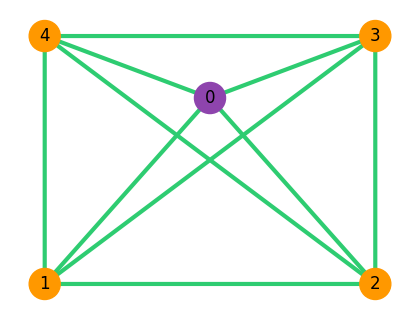

In [20]:
G = [0, 1, 2 , 3, 4]

G = rx.generators.complete_graph(len(G))
pprint(G)
pos = {
    1: (-1, -1),
    2: ( 1, -1),
    3: ( 1,  1),
    4: (-1,  1),
    0: ( 0,  .5), 
}
node_colors = [NS_PURPLE] + [NS_ORANGE] * 4
mpl_draw(G, pos=pos, node_color=node_colors, edge_color=NS_GREEN, 
         with_labels=True, node_size=500, width=3)

In [88]:
# clustering coefficient for N
from itertools import combinations
import math
# degree of node 0
N = 0

k = G.degree(N) 
neighbors = G.neighbors(N) 

# count the edges between the neighbors
edges_between_neighbors =  sum(G.has_edge(u, v) for u, v in combinations(neighbors, 2))
possible_edges = math.comb(k, 2)
print(f"{edges_between_neighbors=}")
print(f"{possible_edges=}")

clustering_coefficient = edges_between_neighbors/possible_edges
print(f"Clustering coefficient of Node 0: {clustering_coefficient}")

4
4
edges_between_neighbors=6
possible_edges=6
Clustering coefficient of Node 0: 1.0


In [89]:
G.remove_edges_from([(1, 2), (4, 2), (3, 1)])

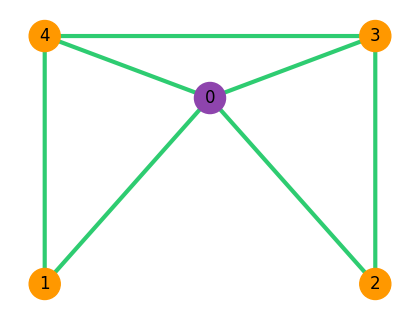

In [90]:
mpl_draw(G, pos=pos, node_color=node_colors, edge_color=NS_GREEN, 
         with_labels=True, node_size=500, width=3)

In [100]:
N = 3

k = G.degree(N) 
neighbors = G.neighbors(N) 

# count the edges between the neighbors
edges_between_neighbors =  sum(G.has_edge(u, v) for u, v in combinations(neighbors, 2))
possible_edges = math.comb(k, 2)
print(f"{edges_between_neighbors=}")
print(f"{possible_edges=}")

clustering_coefficient = edges_between_neighbors/possible_edges
print(f"Clustering coefficient of Node 0: {clustering_coefficient}")

edges_between_neighbors=2
possible_edges=3
Clustering coefficient of Node 0: 0.6666666666666666


In [110]:
def clustering_coefficient(G: rx.PyGraph, n: int) -> float:
    neighbors = G.neighbors(n)
    k = len(neighbors)
    
    if k < 2:
        return 0.0
        
    n_edges = 2 * sum(G.has_edge(u,v)
                for u, v in combinations(neighbors, 2))
    p_edges = k * (k - 1)
    return n_edges / p_edges

def average_clustering_coefficient(G):
    return 1/G.num_nodes() * sum(clustering_coefficient(G, i) 
                                 for i in G.node_indexes())

In [107]:
[(i,clustering_coefficient(G, i)) for i in G.node_indexes()]

[(0, 0.5),
 (1, 1.0),
 (2, 1.0),
 (3, 0.6666666666666666),
 (4, 0.6666666666666666)]

In [109]:
1/G.num_nodes() * sum(clustering_coefficient(G, i) for i in G.node_indexes())

0.7666666666666666

In [111]:
average_clustering_coefficient(G)

0.7666666666666666

---
## Summary

This notebook covered the fundamental graph theory concepts from Chapter 2 of *Network Science*:

| Section | Key Concepts |
|---------|--------------|
| **2.3** | Degree, average degree, degree distribution |
| **2.7** | Bipartite graphs and projections |
| **2.8** | Paths, shortest paths, diameter, cycles, Eulerian/Hamiltonian paths, average path length |

These building blocks form the foundation for understanding more complex network phenomena covered in subsequent chapters.

---
*Notebook companion for [Network Science](http://networksciencebook.com/) by Albert-László Barabási*